Use this as a startiing point to play with Dask a little bit more.
(https://docs.dask.org/en/latest/)

Docker image to use: Jupyter's official scipy notebook (Jupyter/scipy-notebook)
(https://github.com/jupyter/docker-stacks/tree/master/scipy-notebook)

When creating a container, you will want to expose port 8787 on the local host to be able to access the dashboard:

docker run -d -p 8888:8888 -p 8787:8787 jupyter/scipy-notebook

(Then set your browser to https://localhost:8888 to access Jupyter)

Some suggestions:
* Visualize a task graph
* Work with parallelization
* Work with each of the array, bag, dataframe data structures


In [1]:
import dask.dataframe as dd

# datastructures: Dataframe-> pandas, Array-> numpy , Bag (unordered set)-> map/reduce, RDD (Spark)
# parallelization


In [2]:
df = dd.read_csv("taxi-1mil-000.csv", dtype={'store_and_fwd_flag':'str'})


print (df.shape[0].compute(), df.shape[1])

33334 18


In [3]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,VTS,2014-12-12 18:16:00,2014-12-12 18:35:00,3,4.03,-74.014050,40.711707,1,NaN,-73.995627,40.759462,CSH,16.0,1.0,0.5,0.0,0.0,17.5
1,VTS,2014-12-12 18:18:00,2014-12-12 18:36:00,1,4.10,-73.945877,40.780525,1,NaN,-73.972558,40.740458,CRD,15.0,1.0,0.5,4.0,0.0,20.5
2,VTS,2014-12-12 18:31:00,2014-12-12 18:35:00,1,0.96,-73.961450,40.796260,1,NaN,-73.955630,40.787760,CSH,5.5,1.0,0.5,0.0,0.0,7.0
3,VTS,2014-12-08 01:53:00,2014-12-08 01:55:00,5,0.76,-73.955280,40.768675,1,NaN,-73.948977,40.777362,CRD,4.5,0.5,0.5,1.0,0.0,6.5
4,VTS,2014-12-12 17:58:00,2014-12-12 18:34:00,1,11.19,-73.862690,40.768960,1,NaN,-73.745810,40.766700,CSH,35.0,1.0,0.5,0.0,0.0,36.5


In [4]:
print(df.groupby(['vendor_id']).count())

Dask DataFrame Structure:
              pickup_datetime dropoff_datetime passenger_count trip_distance pickup_longitude pickup_latitude rate_code store_and_fwd_flag dropoff_longitude dropoff_latitude payment_type fare_amount surcharge mta_tax tip_amount tolls_amount total_amount
npartitions=1                                                                                                                                                                                                                                                
                        int64            int64           int64         int64            int64           int64     int64              int64             int64            int64        int64       int64     int64   int64      int64        int64        int64
                          ...              ...             ...           ...              ...             ...       ...                ...               ...              ...          ...         ...       ...    

In [5]:
myDF = df.groupby(['vendor_id']).passenger_count.mean().compute()
myDF.head()

vendor_id
CMT    1.361259
VTS    2.000000
Name: passenger_count, dtype: float64

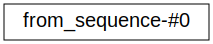

In [9]:
# you may have to install graphviz in your terminal first!
# conda install python-graphviz


import graphviz
import dask.bag as db
bag = db.from_sequence(range(1, 2_000_001))

#needs graphviz
#bag.visualize(filename='2million.svg')
bag.visualize()

bag.dask.visualize()

In [7]:
# this is how you would set up a cluster in Dask


from dask.distributed import Client
client = Client(n_workers = 8, threads_per_worker=1, processes = True)

In [8]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 8
Total threads: 8,Total memory: 12.28 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:46597,Workers: 8
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 12.28 GiB
Comm: tcp://127.0.0.1:43027,Total threads: 1
Dashboard: http://127.0.0.1:41641/status,Memory: 1.54 GiB
Nanny: tcp://127.0.0.1:41449,


In [ ]:
+